<a href="https://colab.research.google.com/github/YanuarN/HarvestHeroes/blob/Luthfi/Machine%20Learning/Corn/Corn_Harvest_Hero_Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries and Kaggle Userkey**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from google.colab import files
from tensorflow.keras.models import load_model
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"starvestrangers","key":"2bf87be7493134161efbf6712e9695e4"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### **Importing Data from Kaggle**

In [ ]:
!kaggle datasets download -d starvestrangers/finaldata
!unzip finaldata.zip -d corn_data


Streaming output truncated to the last 5000 lines.
  inflating: corn_data/train/Northern_Leaf_Blight/Corn_Blight-873-_JPG_jpg.rf.6b15a849729aec5634d6944bb1ad029c.jpg  
  inflating: corn_data/train/Northern_Leaf_Blight/Corn_Blight-875-_JPG_jpg.rf.a22ac3af17a14fd499c81bcfa7b4a801.jpg  
  inflating: corn_data/train/Northern_Leaf_Blight/Corn_Blight-876-_jpg.rf.90650b52394533c7e3daf1d3d5c31e86.jpg  
  inflating: corn_data/train/Northern_Leaf_Blight/Corn_Blight-878-_JPG_jpg.rf.eae4370794639ab788693854d2a061b2.jpg  
  inflating: corn_data/train/Northern_Leaf_Blight/Corn_Blight-879-_JPG_jpg.rf.d65e6a5aa64b0b718c63d50d374574ee.jpg  
  inflating: corn_data/train/Northern_Leaf_Blight/Corn_Blight-881-_JPG_jpg.rf.84dd26407dbe98850131db6d131bd0e9.jpg  
  inflating: corn_data/train/Northern_Leaf_Blight/Corn_Blight-882-_JPG_jpg.rf.f91b112108eea021a35ce6e29f5d7e46.jpg  
  inflating: corn_data/train/Northern_Leaf_Blight/Corn_Blight-883-_JPG_jpg.rf.2f78509f3c577bf6f3db97ce2023e349.jpg  
  inflating: corn

### **Importing Data into Tensor and Preprocess Imaga Data**

In [ ]:
TRAINING_DIR = '/content/corn_data/train'
VALIDATION_DIR = '/content/corn_data/valid'
TEST_DIR = '/content/corn_data/test'

#Preparing Training Data
train_datagen = ImageDataGenerator(rescale=1./255.)


train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    target_size=(224,224),
                                                    batch_size=50,
                                                    class_mode='categorical')
#Preparing Validation Data
validation_datagen = ImageDataGenerator(rescale=1. / 255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size=(224,224),
                                                              batch_size = 50,
                                                              class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1. / 255.)
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size = (224,224),
                                                  batch_size=20,
                                                  class_mode='categorical')




Found 9144 images belonging to 8 classes.
Found 2557 images belonging to 8 classes.
Found 1296 images belonging to 8 classes.


In [ ]:
# Class for the Label
print(train_generator.class_indices)

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3, 'Mold': 4, 'Northern_Leaf_Blight': 5, 'Phosphorus_Deficiency': 6, 'Potassium_Deficiency': 7}


### **Model #2 for Corn Disease Detection** (differ in the dataset that used for training)

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if (logs.get('accuracy') > 0.94 and logs.get('val_accuaracy') > 0.94):
      print('\nTarget Fulfilled, Stop Training...')
      self.model.stop_training=True

callback = myCallback()

# Define the model
model_2 = tf.keras.models.Sequential([

    # Third Convolutional Layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1, 1), input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Fourth Convolutional Layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=(1, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Fifth Convolutional Layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=(1, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.75),
    # Flatten Layer
    tf.keras.layers.Flatten(),

    # Fully Connected Layer
    tf.keras.layers.Dense(56, activation='relu'),

    # Output Layer
    tf.keras.layers.Dense(8, activation='softmax')
])

# Compile the model
model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Fit the model
corn_model = model_1.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callback=[callback]
)


Epoch 1/20
183/183 [==============================] - 84s 429ms/step - loss: 1.0845 - acc: 0.6117 - val_loss: 0.5784 - val_acc: 0.8045
Epoch 2/20
183/183 [==============================] - 73s 398ms/step - loss: 0.5480 - acc: 0.8053 - val_loss: 0.5129 - val_acc: 0.8209
Epoch 3/20
183/183 [==============================] - 73s 398ms/step - loss: 0.3840 - acc: 0.8615 - val_loss: 0.3578 - val_acc: 0.8655
Epoch 4/20
183/183 [==============================] - 72s 394ms/step - loss: 0.3026 - acc: 0.8894 - val_loss: 0.2634 - val_acc: 0.9116
Epoch 5/20
183/183 [==============================] - 71s 389ms/step - loss: 0.2737 - acc: 0.8965 - val_loss: 0.2820 - val_acc: 0.8991
Epoch 6/20
183/183 [==============================] - 70s 384ms/step - loss: 0.2517 - acc: 0.9135 - val_loss: 0.2572 - val_acc: 0.9034
Epoch 7/20
183/183 [==============================] - 70s 381ms/step - loss: 0.2181 - acc: 0.9224 - val_loss: 0.2297 - val_acc: 0.9108
Epoch 8/20
183/183 [==============================] - 7

### **Saved Model #2**

In [ ]:
from google.colab import files
model_2.save('Prototype_Corn_2.h5')
files.download('Prototype_Corn_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Load Model #2**

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Prototype_Corn_2.h5')


### **Model #2 Evaluation Accuracy on Test Data**

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model_1.evaluate(test_generator)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


65/65 [==============================] - 4s 47ms/step - loss: 0.2327 - acc: 0.9321
Test Loss: 0.23267795145511627
Test Accuracy: 0.9320987462997437


### **Predicting Self Input Image**

Saving cr-72-_png.rf.d44456bd808489363933f848b16eb6c9.jpg to cr-72-_png.rf.d44456bd808489363933f848b16eb6c9.jpg


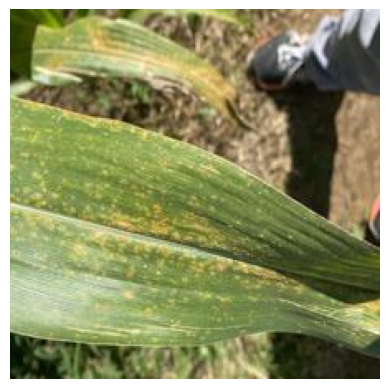

Classifying image: cr-72-_png.rf.d44456bd808489363933f848b16eb6c9.jpg
1/1 [==============================] - 0s 28ms/step
Prediction: Common_Rust
index: 1


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Define the class labels
class_labels = [
    'Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy', 'Mold', 'Northern_Leaf_Blight', 'Phosphorus_Deficiency', 'Potassium_Deficiency']

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224, 3))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to make prediction
def classify_image(img_path):
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    class_idx = np.argmax(prediction, axis=1)[0]
    class_label = class_labels[class_idx]
    return class_label, class_idx

# Upload an image
uploaded = files.upload()

for fn in uploaded.keys():
    # Display the image
    img_path = fn
    img = image.load_img(img_path, target_size=(224, 224, 3))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Classify the image
    print(f"Classifying image: {fn}")
    result, class_idx = classify_image(img_path)
    print(f"Prediction: {result}")
    print(f"index: {class_idx}")